https://brightwon.tistory.com/11
MFCC란?
MFCC는 오디오 신호에서 추출할 수 있는 feature로, 소리의 고유한 특징을 나타내는 수치입니다.

MFCC의 기술적인 이해
기술적으로 말하면, MFCC(Mel-Frequency Cepstral Coefficient)는 Mel Spectrum(멜 스펙트럼)에서 Cepstral(켑스트럴) 분석을 통해 추출된 값입니다.

따라서, MFCC를 기술적으로 이해하려면 선행으로 다음 개념들을 알아야 합니다.

-  Spectrum(스펙트럼)

-  Cepstrum(켑스트럼)

-  Mel Spectrum(멜 스펙트럼)

In [1]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install resampy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import glob
import librosa
import numpy as np
import pandas as pd
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

2023-10-14 13:46:54.179510: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-14 13:46:54.181748: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-14 13:46:54.218869: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-14 13:46:54.219471: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-14 13:46:54.818468: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [5]:
# MFCC를 추출하기 위해서는

# 스펙트로그램 생성
# 멜 스케일 적용, 멜 스펙트로그램 생성
# 캡스트럴 분석을 통해 MFCC 특성을 추출
    # 캡스트럴 분석은 스펙트럼에서 배움 구조를 유추할 수 있도록 도와줌
        # 배움 구조란 음향의 음색? 정도로 생각하면 된다.
    # 멜 스텍트로그램에 절댓값과 로그를 취한 뒤 역 푸리에 변환을 수행하면 완료!

root = "../data/wavs/test/"
test = root + "Overhead Sample 30.wav"

max_pad_len = 174

def extract_feature(file_name):
    print('file name :', file_name)
    try:
        # res_type='kaiser_fast' : resampy 더 빠른 방법
        # 여부에 따라 값이 다르게 나오긴 함
        # resampy
        # 다차원 리샘플링을 지원하며 오디오 애플리케이션에 매우 적합합니다.
        # 장기간 신호(예: 고품질 샘플링 속도에서 몇 분)의 경우 resampy는 scipy.signal.resample 보다
        # 상당히 빠르며 오디오 품질에서는 인지할 수 있는 차이가 거의 없습니다.
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        # audio, sample_rate = librosa.load(file_name)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0,0), (0, pad_width)), mode='constant')
        print(mfccs.shape)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        print(e)
        return None
    
#     return padded_mfccs
    return mfccs

extract_feature(test)

file name : ../data/wavs/test/Overhead Sample 30.wav
(40, 174)


array([[-71.170845  , -33.86195   , -32.417633  , ...,   0.        ,
          0.        ,   0.        ],
       [ 45.89365   ,  40.971138  ,  21.852135  , ...,   0.        ,
          0.        ,   0.        ],
       [-21.124023  , -29.353714  , -34.730606  , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  1.486055  ,  -0.6735269 ,   0.29030752, ...,   0.        ,
          0.        ,   0.        ],
       [ -4.558303  ,  -5.945115  ,  -3.4609108 , ...,   0.        ,
          0.        ,   0.        ],
       [  5.622891  ,   5.185076  ,   9.278199  , ...,   0.        ,
          0.        ,   0.        ]], dtype=float32)

In [6]:
root_path = "../data/wavs/train/"
wav_list = os.listdir(root_path)
wav_files = [os.path.join(root_path, file) for file in wav_list if file.endswith('.wav')]
print(len(wav_files))

# data는 우리가 리브로사로 추출한 mfccs라는 특성이고
# class_label은 그 음향의 종류를 나타낸다.

features = []
for wav_file in wav_files:
    data = extract_feature(wav_file)
    class_label = 0
    if 'Overhead' in wav_file:
        class_label = 1
    elif 'Snare' in wav_file:
        class_label = 2
    elif 'Tom' in wav_file:
        class_label = 3
    else:
        class_label = 0
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

120
file name : ../data/wavs/train/Overhead Sample 1.wav
(40, 174)
file name : ../data/wavs/train/Overhead Sample 10.wav
(40, 174)
file name : ../data/wavs/train/Overhead Sample 11.wav
(40, 174)
file name : ../data/wavs/train/Overhead Sample 12.wav
(40, 174)
file name : ../data/wavs/train/Overhead Sample 13.wav
(40, 174)
file name : ../data/wavs/train/Overhead Sample 14.wav
(40, 174)
file name : ../data/wavs/train/Overhead Sample 15.wav
(40, 174)
file name : ../data/wavs/train/Overhead Sample 16.wav
(40, 174)
file name : ../data/wavs/train/Overhead Sample 17.wav
(40, 174)
file name : ../data/wavs/train/Overhead Sample 18.wav
(40, 174)
file name : ../data/wavs/train/Overhead Sample 19.wav
(40, 174)
file name : ../data/wavs/train/Overhead Sample 2.wav
(40, 174)
file name : ../data/wavs/train/Overhead Sample 20.wav
(40, 174)
file name : ../data/wavs/train/Overhead Sample 21.wav
(40, 174)
file name : ../data/wavs/train/Overhead Sample 22.wav
(40, 174)
file name : ../data/wavs/train/Overhea

In [7]:
from keras.utils import to_categorical

# 불러온 featuresdf에서 feature는 X에 저장하였고 class_label은 y로 저장하였다.
# 헌데 y는 yy로 변환과정을 거쳐서 다시 저장되었다.
# 둘의 차이는 원-핫-인코딩의 여부이다.
# 원-핫-인코딩은 1,2,3 있을 때 1: [1.0.0] / 2:[0.1.0] / 3:[0.0.1] 로 변환해주는 거임.
# 이렇게 변환해서 사용하는 이유는 우리가 작성할 딥러닝 모델이 멀티 클래스(3~ 가지) 분류를 하기 때문이다.

X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y[:10])
print(yy[:10])
print(y_test[:10])

(96, 40, 174)
(24, 40, 174)
[1 1 1 1 1 1 1 1 1 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [9]:
n_columns = 174    
n_row = 40       
n_channels = 1
n_classes = 3

# input shape 조정
# cpu를 사용해서 수행한다
with tf.device('/cpu:0'):
    x_train = tf.reshape(x_train, [-1, n_row, n_columns, n_channels])
    x_test = tf.reshape(x_test, [-1, n_row, n_columns, n_channels])

In [10]:
# # GPU 메모리 해제가 안될 때
# from numba import cuda 
# device = cuda.get_current_device()
# device.reset()

# # 모델 삭제
# del model

model = keras.Sequential()

model.add(layers.Conv2D(input_shape=(n_row, n_columns, n_channels), filters=16, kernel_size=2, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(kernel_size=2, filters=32, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(kernel_size=2, filters=64, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(kernel_size=2, filters=128, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))

model.add(layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(units=n_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 39, 173, 16)       80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 19, 86, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 19, 86, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 85, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 9, 42, 32)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 9, 42, 32)         0

In [11]:
training_epochs = 72
num_batch_size = 128

learning_rate = 0.001
opt = keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=training_epochs)

Epoch 1/72
1/1 [==============================] - 1s 972ms/step - loss: 13.2146 - accuracy: 0.3542
Epoch 2/72
1/1 [==============================] - 0s 66ms/step - loss: 3.1331 - accuracy: 0.4896
Epoch 3/72
1/1 [==============================] - 0s 59ms/step - loss: 6.3664 - accuracy: 0.4792
Epoch 4/72
1/1 [==============================] - 0s 67ms/step - loss: 4.2748 - accuracy: 0.5417
Epoch 5/72
1/1 [==============================] - 0s 62ms/step - loss: 2.4551 - accuracy: 0.5521
Epoch 6/72
1/1 [==============================] - 0s 54ms/step - loss: 2.0810 - accuracy: 0.6458
Epoch 7/72
1/1 [==============================] - 0s 57ms/step - loss: 3.1302 - accuracy: 0.6667
Epoch 8/72
1/1 [==============================] - 0s 59ms/step - loss: 3.4252 - accuracy: 0.6771
Epoch 9/72
1/1 [==============================] - 0s 75ms/step - loss: 1.7712 - accuracy: 0.6667
Epoch 10/72
1/1 [==============================] - 0s 64ms/step - loss: 1.4673 - accuracy: 0.6771
Epoch 11/72
1/1 [==========

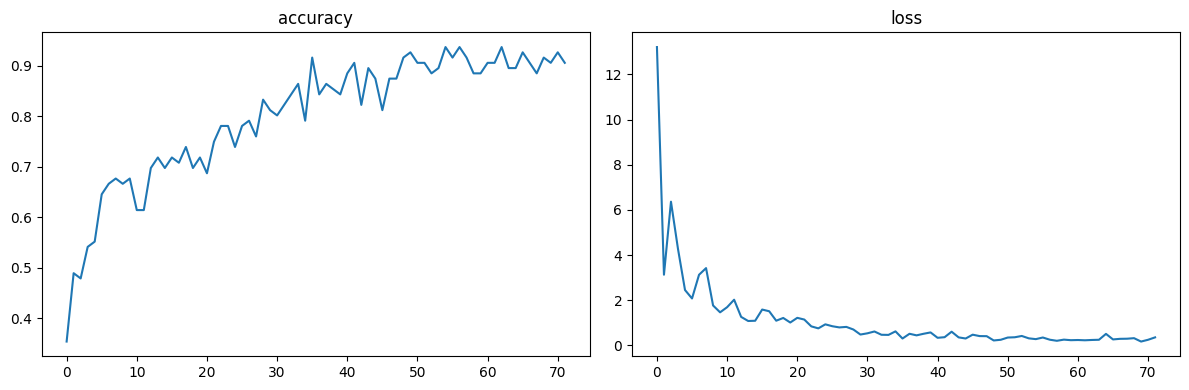

In [12]:
import matplotlib.pyplot as plt

def vis(history, key):
    x = np.arange(0, training_epochs)
    y = list(history.history[key])
    plt.plot(x, y)
    plt.title(key)
    
def plot_history(history) :
    # 0 accuracy, 1 loss
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()
    
plot_history(history)

In [13]:
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results)

model.save("drum_classifier_model")


# Evaluate on test data
1/1 [==============================] - 0s 132ms/step - loss: 0.6541 - accuracy: 0.8333
test loss, test acc: [0.6540886163711548, 0.8333333134651184]
INFO:tensorflow:Assets written to: drum_classifier_model/assets


INFO:tensorflow:Assets written to: drum_classifier_model/assets


In [20]:
root = "../data/wavs/test/"
# test = root + "Overhead Sample 30.wav"
# test = root + "Snare Sample 30.wav"
test = root + "Tom Sample 30.wav"

n_columns = 174    
n_row = 40       
n_channels = 1

# input shape 조정
# cpu를 사용해서 수행한다
test = np.array(extract_feature(test))
with tf.device('/cpu:0'):
    test = tf.reshape(test, [-1, n_row, n_columns, n_channels])

model.predict(test, batch_size=128)

file name : ../data/wavs/test/Tom Sample 30.wav
(40, 174)
1/1 [==============================] - 0s 45ms/step


array([[1.4331445e-04, 2.0036278e-03, 9.9785304e-01]], dtype=float32)